In [2]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas_datareader as pdr
import numpy as np

In [3]:
# set the start and end dates for the data
start_date = '1955-01-01'
end_date = '2022-01-01'
lambdas = [10, 100, 1600]
# download the data from FRED using pandas_datareader
country_series = {
    "Brazil":'NGDPRSAXDCBRQ',
    "Japan" :'NGDPRSAXDCJPQ',
}

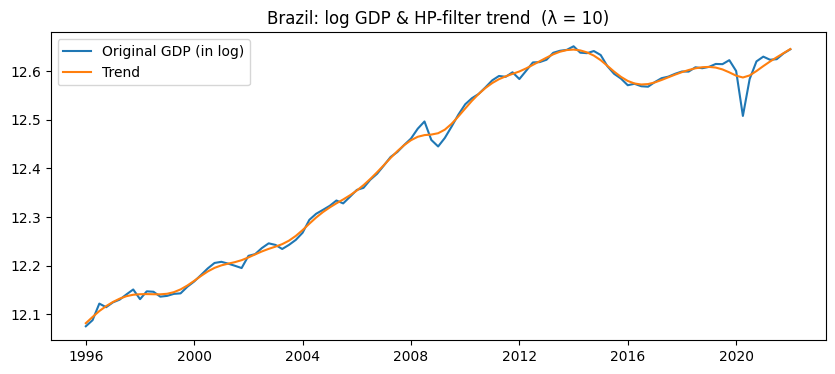

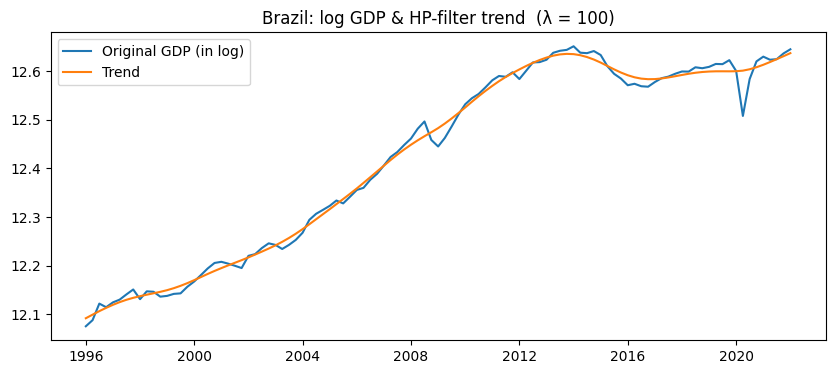

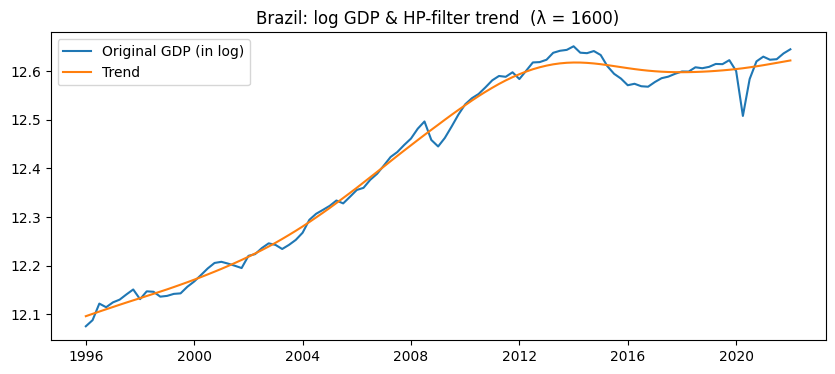

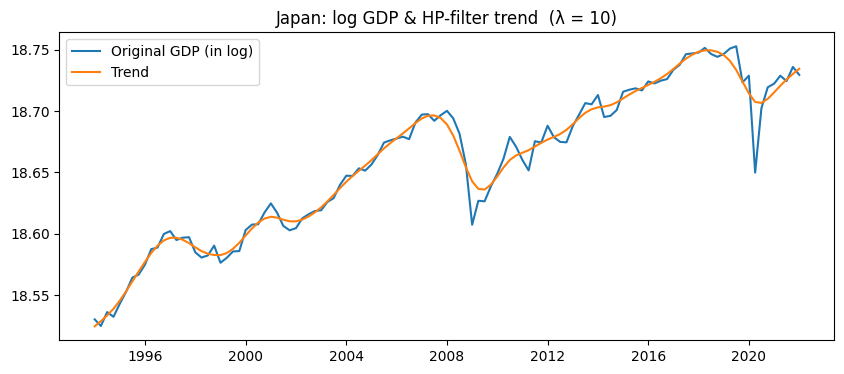

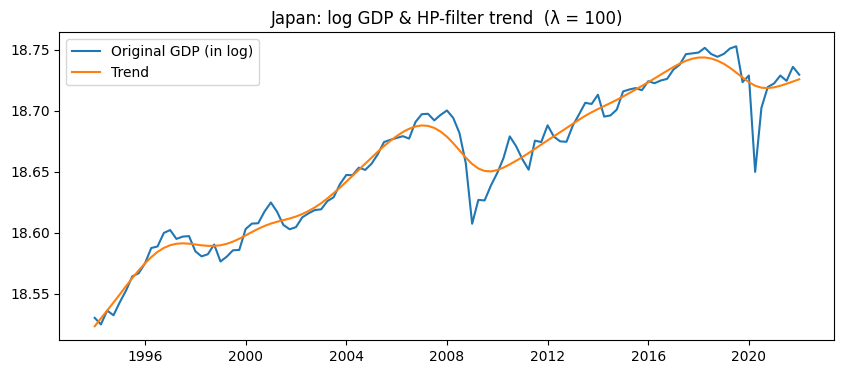

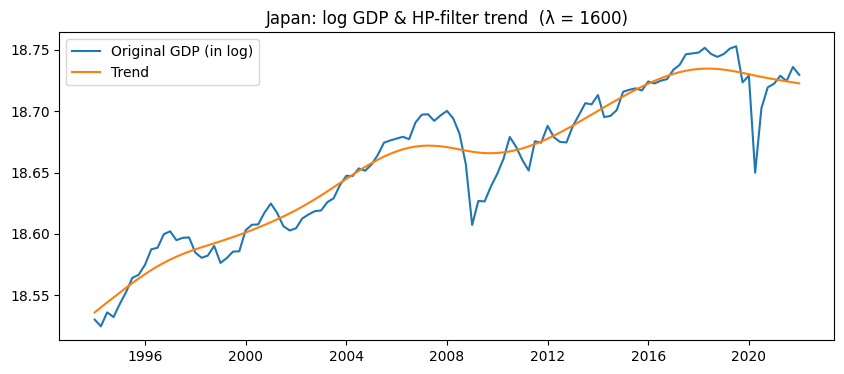

In [4]:
# collect all cyclical components
cycle_data = {country: {} for country in country_series}

# for loop of each country
for country, series_id in country_series.items():
    gdp = web.DataReader(series_id, 'fred', start_date, end_date)
    log_gdp = np.log(gdp[series_id])

# apply a Hodrick-Prescott filter to the data to extract the cyclical component
# use for loop to compute every lambda

    for lamb in lambdas:
        cycle, trend = sm.tsa.filters.hpfilter(log_gdp, lamb)
        cycle_data[country][lamb] = cycle
        
    # Plot the original time series data
        plt.figure(figsize=(10, 4))
        plt.plot(log_gdp, label="Original GDP (in log)")
        plt.title(f'{country}: log GDP & HP-filter trend  (λ = {lamb})')

    # Plot the trend component
        plt.plot(trend, label="Trend")

    # Add a legend and show the plot
        plt.legend()
        plt.show()

In [5]:
for lamb in lambdas:
    # 1) compute std dev for each country at this λ
    std_series = pd.Series(
        {country: cycle_data[country][lamb].std() for country in country_series},
        name='StdDev'
    )
    
    # 2) compute the single Brazil–Japan correlation at this λ
    corr = cycle_data['Brazil'][lamb].corr(cycle_data['Japan'][lamb])
    
    # 3) build a DataFrame and print
    stats_df = pd.DataFrame({
        'StdDev': std_series,
        'Corr_with_Japan': corr  # scalar broadcasts to all rows
    })
    
    print(f"\nλ = {lamb}")
    print(stats_df)



λ = 10
          StdDev  Corr_with_Japan
Brazil  0.011323         0.683699
Japan   0.008857         0.683699

λ = 100
          StdDev  Corr_with_Japan
Brazil  0.014965         0.722456
Japan   0.012007         0.722456

λ = 1600
          StdDev  Corr_with_Japan
Brazil  0.018848         0.581893
Japan   0.016093         0.581893


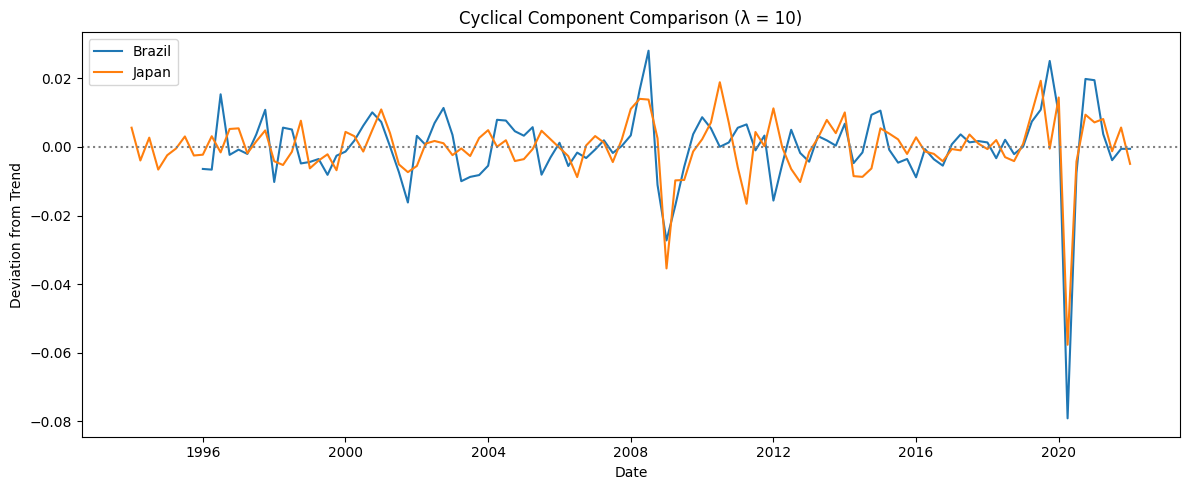

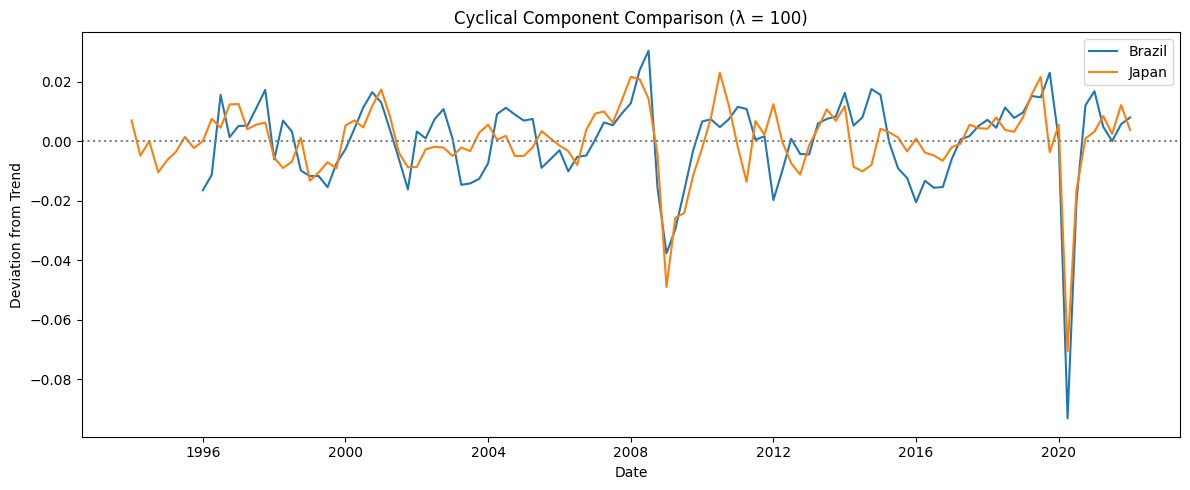

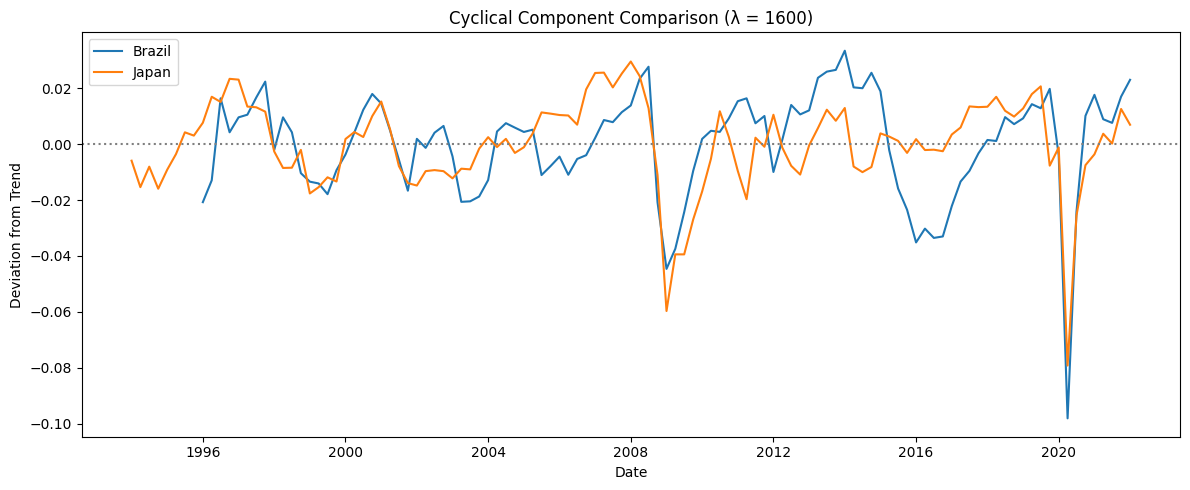

In [6]:
# Plot cyclical components for each country on a single graph  
import matplotlib.pyplot as plt
lambdas_to_plot = lambdas  

for lamb in lambdas_to_plot:
    plt.figure(figsize=(12,5))
    for country in country_series:
        plt.plot(cycle_data[country][lamb], label=country)
    plt.axhline(0, color='gray', linestyle=':')
    plt.title(f'Cyclical Component Comparison (λ = {lamb})')
    plt.xlabel('Date')
    plt.ylabel('Deviation from Trend')
    plt.legend()
    plt.tight_layout()
    plt.show()
